In [1]:
'''Trains a simple RNN-LSTM on sine waveform data.
'''
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import seed, random
%matplotlib inline

np.random.seed(1337)  # for reproducibility

# Simulate data
dates = pd.date_range(start='2009-01-01', end='2015-12-31', freq='D')
n = len(dates)
a = np.sin(np.arange(n) * 2 * np.pi / 7)
# b = np.sin(np.arange(n) * 2 * np.pi / 7)
# c = np.sin(np.arange(n) * 2 * np.pi / 7)
# pdata = pd.DataFrame({"a":a, "b":b, "c":c})
pdata = pd.DataFrame({"a":a}, index=dates)
data = pdata

D:\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


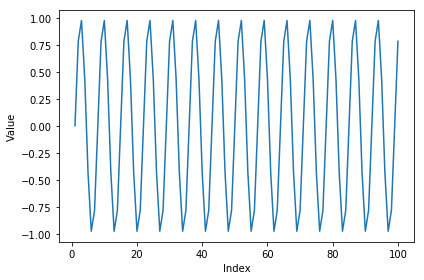

In [2]:
# visualize data
n_plot = 100
plt.figure()
plt.plot(range(1, n_plot+1), data.a[:n_plot])
plt.xlabel('Index')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [3]:
def _load_data(data, n_prev = 100):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))

    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])

    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

In [4]:
# define model structure
in_out_neurons = 1
hidden_neurons = 300
model = Sequential()
model.add(LSTM(input_dim=in_out_neurons, output_dim=hidden_neurons, return_sequences=False))
model.add(Dense(output_dim=in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:5: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
D:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


In [5]:
# and now train the model
# batch_size should be appropriate to your memory size
# number of epochs should be higher for real world problems
model.fit(X_train, y_train, batch_size=50, nb_epoch=10, validation_split=0.05)

D:\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 2090 samples, validate on 110 samples
Epoch 1/10
2090/2090 [==============================] - 22s 11ms/step - loss: 0.0626 - val_loss: 0.0083
Epoch 2/10
2090/2090 [==============================] - 24s 12ms/step - loss: 0.0085 - val_loss: 0.0070
Epoch 3/10
2090/2090 [==============================] - 24s 12ms/step - loss: 0.0070 - val_loss: 0.0019
Epoch 4/10
2090/2090 [==============================] - 26s 12ms/step - loss: 0.0051 - val_loss: 0.0035
Epoch 5/10
2090/2090 [==============================] - 25s 12ms/step - loss: 0.0047 - val_loss: 0.0014
Epoch 6/10
2090/2090 [==============================] - 24s 11ms/step - loss: 0.0038 - val_loss: 0.0030
Epoch 7/10
2090/2090 [==============================] - 26s 12ms/step - loss: 0.0035 - val_loss: 0.0056
Epoch 8/10
2090/2090 [==============================] - 26s 12ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 9/10
2090/2090 [==============================] - 26s 12ms/step - loss: 0.0029 - val_loss: 0.0056
Epoch 10/10
2090/

In [6]:
# evaluate model fit
score = model.evaluate(X_test, y_test)
print('Test score:', score)

156/156 [==============================] - 0s 3ms/step
Test score: 0.0002494499241061604


Text(0.5,1,'Test Population and Prediction')

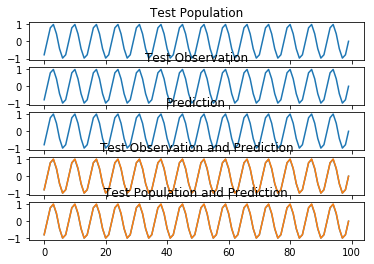

In [7]:
# visualize predictions
train_prediction = model.predict(X_train)
test_prediction = model.predict(X_test)

_, axarr = plt.subplots(5, sharex=True, sharey=True)
axarr[0].plot(a[(len(a) - n_plot):len(a)])
axarr[0].set_title('Test Population')
axarr[1].plot(y_test[:n_plot])
axarr[1].set_title('Test Observation')
axarr[2].plot(test_prediction[:n_plot])
axarr[2].set_title('Prediction')
axarr[3].plot(y_test[:n_plot])
axarr[3].plot(test_prediction[:n_plot])
axarr[3].set_title('Test Observation and Prediction')
axarr[4].plot(a[(len(a) - n_plot):len(a)])
axarr[4].plot(test_prediction[:n_plot])
axarr[4].set_title('Test Population and Prediction')